###Import the Libraries

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import plot_model

###Import Data and Scaling

In [25]:
# Step 1: Fetch Real-Time Stock Data
symbol = 'GOOG'
stock_data = yf.download(symbol, start='2015-01-01', end='2023-01-01')

# Step 2: Data Preprocessing
data = stock_data[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
print(data)
# Use MinMaxScaler for 'Open', 'High', 'Low', and 'Volume' columns
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume']])

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low    Volume  Adj Close
Date                                                            
2015-01-02  26.378078  26.490770  26.133251  28951268  26.168653
2015-01-05  26.091366  26.144720  25.582764  41196796  25.623152
2015-01-06  25.679497  25.738087  24.983908  57998800  25.029282
2015-01-07  25.280592  25.292759  24.914099  41301082  24.986401
2015-01-08  24.831326  25.105074  24.482782  67071641  25.065184
...               ...        ...        ...       ...        ...
2022-12-23  87.620003  90.099998  87.620003  17815000  89.809998
2022-12-27  89.309998  89.500000  87.535004  15470900  87.930000
2022-12-28  87.500000  88.519997  86.370003  17879600  86.459999
2022-12-29  87.029999  89.364998  86.989998  18280700  88.949997
2022-12-30  87.364998  88.830002  87.029999  19190300  88.730003

[2014 rows x 5 columns]


<ipython-input-25-6959b6302d8d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume']])


In [26]:
print(data)

                Open      High       Low    Volume  Adj Close
Date                                                         
2015-01-02  0.013469  0.013817  0.014509  0.101752  26.168653
2015-01-05  0.011215  0.011100  0.010125  0.158349  25.623152
2015-01-06  0.007977  0.007908  0.005357  0.236006  25.029282
2015-01-07  0.004841  0.004411  0.004801  0.158831  24.986401
2015-01-08  0.001309  0.002938  0.001366  0.277940  25.065184
...              ...       ...       ...       ...        ...
2022-12-23  0.494936  0.513226  0.504146  0.050281  89.809998
2022-12-27  0.508222  0.508515  0.503469  0.039447  87.930000
2022-12-28  0.493993  0.500821  0.494192  0.050580  86.459999
2022-12-29  0.490298  0.507455  0.499129  0.052434  88.949997
2022-12-30  0.492931  0.503255  0.499448  0.056638  88.730003

[2014 rows x 5 columns]


<Axes: xlabel='Date'>

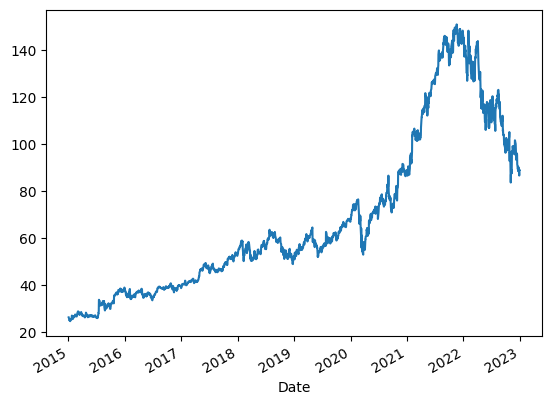

In [27]:
stock_data['Adj Close'].plot()

In [28]:
# Create sequences for LSTM
sequence_length = 1  # adjust as needed
input_data = []
target_data = []

for i in range(len(data) - sequence_length):
    input_data.append(data.iloc[i:i + sequence_length, :-1].values)
    target_data.append(data.iloc[i + sequence_length - 1, -1])

input_data = np.array(input_data)
target_data = np.array(target_data)

###Model Creation and Training

In [29]:
# Step 3: Model Creation
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(sequence_length, data.shape[1] - 1), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Plot the model
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Step 4: Model Training (if not already trained)
lstm.fit(input_data, target_data, epochs=50, batch_size=8)

# Step 5: Model Loading (if already trained)
# model = load_model('your_lstm_model.h5')

Epoch 1/50
252/252 [==============================] - 2s 2ms/step - loss: 5628.2412
Epoch 2/50
252/252 [==============================] - 0s 2ms/step - loss: 4485.3096
Epoch 3/50
252/252 [==============================] - 0s 1ms/step - loss: 2554.9978
Epoch 4/50
252/252 [==============================] - 0s 2ms/step - loss: 988.6032
Epoch 5/50
252/252 [==============================] - 0s 2ms/step - loss: 251.7681
Epoch 6/50
252/252 [==============================] - 0s 2ms/step - loss: 54.8701
Epoch 7/50
252/252 [==============================] - 0s 2ms/step - loss: 22.3727
Epoch 8/50
252/252 [==============================] - 0s 2ms/step - loss: 12.9106
Epoch 9/50
252/252 [==============================] - 0s 2ms/step - loss: 8.3361
Epoch 10/50
252/252 [==============================] - 0s 2ms/step - loss: 6.4059
Epoch 11/50
252/252 [==============================] - 0s 2ms/step - loss: 5.3628
Epoch 12/50
252/252 [==============================] - 0s 2ms/step - loss: 4.5996
Epoch 13/

###Model Prediction

In [30]:
# Step 6: Model Prediction
predictions = lstm.predict(input_data)

# Step 7: Display or Use Predictions
print("Predicted Adj Close Prices:")
print(predictions)


63/63 [==============================] - 0s 1ms/step
Predicted Adj Close Prices:
[[26.86188 ]
 [26.495638]
 [25.984966]
 ...
 [89.21531 ]
 [87.88456 ]
 [88.237755]]


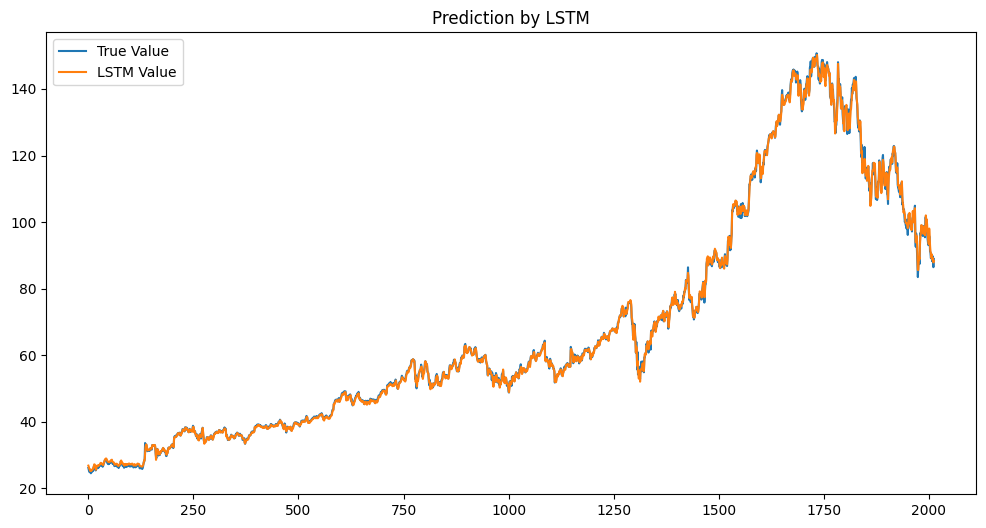

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(target_data, label='True Value')
plt.plot(predictions, label='LSTM Value')
plt.title('Prediction by LSTM')
#plt.xlabel('Time Scale')
#plt.ylabel('Scaled USD')
plt.legend()


###Comparing Actual vs Predicted

####By Date

In [35]:
# Step 9: Specify the date for comparison
comparison_date = '2017-12-13'
comparison_index = stock_data.index.get_loc(comparison_date)

# Step 10: Compare Actual vs Predicted for the specified date
actual_value = data.loc[comparison_date, 'Adj Close']
predicted_value = predictions[comparison_index - sequence_length]
print(actual_value)
print(predicted_value)

52.03049850463867
[51.86005]


####By Input Values

In [34]:
pred_future= lstm.predict(scaler.transform([[128.410004,129.949997,127.430000,77034200]]).reshape((1,sequence_length,4)))
print(pred_future)

1/1 [==============================] - 0s 14ms/step
[[127.59035]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


###Accuracy Score

In [33]:
#verify r2 score for actual and prediction values

from sklearn.metrics import r2_score
r2 = r2_score(target_data, predictions)
print('R2 score:', r2)


R2 score: 0.9994629765923398
